# M4 - D8 Python esercitazione finale

## Analisi dati Covid19
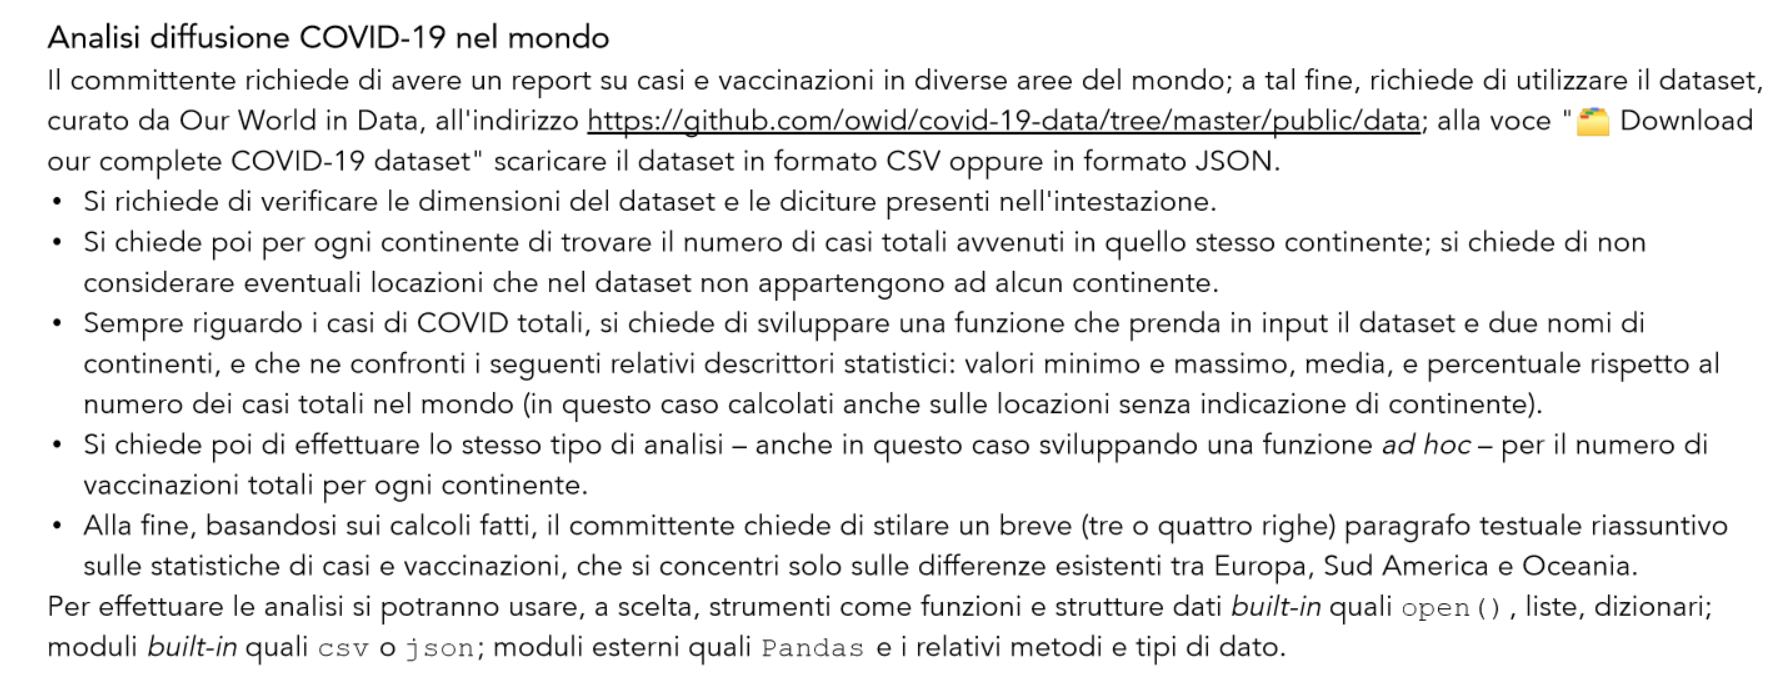

<a id = 'top'><a/>

[0. Analisi esploratoria](#analisi_espl)
    
[1. Analisi dati](#analisi_dati)

[1.1 Casi totali per continente](#casi_cont)

[1.2 Casi totali per continente - funzione](#casi_funz)

[1.3 Vaccini totali per continente - funzione](#vacc_funz)

[2. Analisi](#analisi_testo)

<a id = 'analisi_espl'><a/>
## 0. Analisi esploratoria
[Top](#top)

In [15]:
import pandas as pd
import matplotlib as plt
import plotly.express as px 

In [79]:
df_covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv",
                      low_memory=False)

In [56]:
records, attributes = df_covid.shape
print(f"Il dataframe è composto da {records} records e {attributes} attributi")

Il dataframe è composto da 311568 records e 67 attributi


In [24]:
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [25]:
df_covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.753350e+05,3.026550e+05,3.013910e+05,2.546350e+05,302735.000000,301505.000000,275335.000000,302655.000000,301391.000000,254635.000000,...,178657.000000,118216.000000,213129.000000,286496.000000,234025.000000,3.115680e+05,1.066900e+04,10669.000000,10669.000000,10669.000000
mean,5.767156e+06,1.073397e+04,1.077678e+04,8.061661e+04,95.740952,96.103652,88010.375666,161.890445,162.525589,811.194069,...,32.911764,50.793373,3.098168,73.719847,0.722553,1.284642e+08,4.739668e+04,9.538903,12.633550,1477.149682
std,3.600088e+07,1.030085e+05,1.002455e+05,4.164645e+05,600.706338,591.334247,138439.520139,1127.171598,634.547240,1053.772688,...,13.572586,31.956927,2.548779,7.396582,0.148993,6.607637e+08,1.384241e+05,12.914011,26.344219,1840.907839
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-1984.281600
25%,6.565000e+03,0.000000e+00,1.143000e+00,1.210000e+02,0.000000,0.000000,2039.082000,0.000000,0.246000,50.398500,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,2.780000e+01,0.560000,-1.200000,24.645111
50%,6.239700e+04,1.700000e+01,3.771400e+01,1.230000e+03,0.000000,0.286000,20898.389000,2.396000,10.664000,338.621000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,4.530999e+03,7.750000,6.490000,900.418500
75%,6.419815e+05,5.230000e+02,6.310000e+02,1.064800e+04,6.000000,6.714000,107810.942500,68.501000,103.445000,1246.603000,...,41.300000,83.241000,4.200000,79.460000,0.829000,2.830170e+07,3.159700e+04,15.360000,18.070000,2399.257000
max,7.664400e+08,7.460822e+06,6.410667e+06,6.932578e+06,20027.000000,14677.857000,737554.506000,228872.025000,37241.781000,6476.319000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.282260e+06,76.550000,377.300000,10291.122000


In [27]:
df_covid_cases = df_covid[["continent", "location", "date", "total_cases", "new_cases"]]
df_covid_cases

,continent,location,date,total_cases,new_cases
0,Asia,Afghanistan,2020-01-03,NaN,0.0
1,Asia,Afghanistan,2020-01-04,NaN,0.0
2,Asia,Afghanistan,2020-01-05,NaN,0.0
3,Asia,Afghanistan,2020-01-06,NaN,0.0
4,Asia,Afghanistan,2020-01-07,NaN,0.0
...,...,...,...,...,...
311563,Africa,Zimbabwe,2023-05-13,264821.0,5.0
311564,Africa,Zimbabwe,2023-05-14,264841.0,20.0
311565,Africa,Zimbabwe,2023-05-15,264848.0,7.0
311566,Africa,Zimbabwe,2023-05-16,264848.0,0.0


In [53]:
continent_list_n = list(set(df_covid["continent"]))
continent_list = []
for i in continent_list_n:
    if str(i) != "nan":
        continent_list.append(str(i))
continent_list

['Europe', 'Oceania', 'South America', 'North America', 'Africa', 'Asia']

In [54]:
location_list_n = list(set(df_covid["location"]))
for i in continent_list:
    print(i in location_list_n)

True
True
True
True
True
True


L'attributo "total_cases" fa riferimento ai casi totali, cumulativi dall'inizio della pandemia. Per questo motivo per poter ottenre il totale dei casi per ogni continente, si dovranno utilizzare i dati della colonna "new_cases", che rappresentano i nuovi casi tracciati ogni giorno (non cumulandoli).

Tra i continenti sono inclusi anche record caratterizzati da continenti NaN. Questi corrispondono a record, il cui valor "location" risulta essere un continente invece che una nazione, e di conseguenza i dati relativi ai casi e vaccini sono i dati sommati dall'inizio della pandemia. Per questo motivo per poter ottenere dati realistici, i record con "continent" == NaN verranno esclusi dalla dataframe.

<a id = 'analisi_dati'><a/>
## 1. Analisi dati

<a id = 'casi_cont'><a/>
### 1.1 Casi totali per continente
[Top](#top)

In [113]:
condizione_nan = (df_covid["continent"].notna())
df_covid_cont = df_covid[condizione_nan]

df_covid_cont_cases = df_covid_cont.groupby("continent")[["new_cases", "population"]].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                                            "new_cases":"Total cases",
                                                                                                                            "population":"Population"})
df_covid_cont_cases.sort_values("Total cases", ascending = False, inplace = True)
df_covid_cont_cases

,Continent,Total cases,Population
1,Asia,297234406.0,5.821182e+12
2,Europe,249319188.0,9.999506e+11
3,North America,124175560.0,7.407082e+11
5,South America,68568119.0,5.382548e+11
4,Oceania,14073975.0,5.546907e+10
0,Africa,13088991.0,1.755704e+12


In [89]:
tot_world_cases = df_covid_cont_cases["Total cases"].sum()
print(f"Il numero di casi totali nel mondo ammonta a {int(tot_world_cases)}.")

Il numero di casi totali nel mondo ammonta a 766460239.


Il continente col maggior numero di casi è l'Asia (297,234,406 casi) seguito da Europa (249,319,188) e Nord America (12,417,556). L'Africa presenta il minor numero di casi Covdi19 (13,088,991), nonostante presenti una popolazione simile all'Asia. Questo potrebbe essere riconducibile ad un numero inferiore di test effettuati e/o riportati.

(Interessatne fare un'analisi sul numero di test).

<a id = 'casi_funz'><a/>
### 1.2 Casi totali per continente - funzione
[Top](#top)

In [126]:
def case_continent(df, continente1, continente2):
    
    if df["continent"].isnull().values.any():
        
        # Esclusione dei "continetn" == "NaN"
        condizione_nan = df["continent"].notna()
        df = df[condizione_nan]
        
        # Selezione di soli due continenti
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2)
        df_cont = df[condizione_cont]
        
        # Min max mean
        df_min = df_cont.groupby("continent")["total_cases"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Minum value"})
        df_max = df_cont.groupby("continent")["total_cases"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Maximum value"})
        df_mean = df_cont.groupby("continent")["total_cases"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                     "total_cases":"Mean value"})
        # Percentuali
        df_covid_cont_cases = df.groupby("continent")["new_cases"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                         "new_cases":"Total cases"})
        
        cases_cont1 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente1, "Total cases"].iloc[0]
        cases_cont2 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente2, "Total cases"].iloc[0]
        
        world_cases = df_covid_cont_cases["Total cases"].sum()
        
        perc_cont1 = round(((cases_cont1 / world_cases) * 100), 2)
        perc_cont2 = round(((cases_cont2 / world_cases) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2], "Percentage of caseson world total":[perc_cont1, perc_cont2]})
        
        # df finale
        df_merged = pd.merge(df_min, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent")
        
    elif df["continent"].notna().values.all():
        df_covid_cont_cases = df.groupby("continent")["new_cases"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                         "new_cases":"Total cases"})
        
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2)
        
        df_cont = df[condizione_cont]
        
        # Min max mean
        df_min = df_cont.groupby("continent")["total_cases"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Minum value"})
        df_max = df_cont.groupby("continent")["total_cases"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                   "total_cases":"Maximum value"})
        df_mean = df_cont.groupby("continent")["total_cases"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                     "total_cases":"Mean value"})
        # Percentuali
        cases_cont1 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente1, "Total cases"].iloc[0]
        cases_cont2 = df_covid_cont_cases.loc[df_covid_cont_cases["Continent"] == continente2, "Total cases"].iloc[0]
        
        world_cases = df_covid_cont_cases["Total cases"].sum()
        
        perc_cont1 = round(((cases_cont1 / world_cases) * 100), 2)
        perc_cont2 = round(((cases_cont2 / world_cases) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2], "Percentage of cases on world total":[perc_cont1, perc_cont2]})
        
        # df finale
        df_merged = pd.merge(df_min, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent")
    
    return df_merged

In [127]:
case_continent(df_covid, "Asia", "Oceania")

,Continent,Minum value,Maximum value,Mean value,Percentage of caseson world total
0,Asia,1.0,99256991.0,2.255135e+06,38.78
1,Oceania,1.0,11299954.0,2.724134e+05,1.84


<a id = 'vacc_funz'><a/>
### 1.3 Vaccini totali per continente - funzione
[Top](#top)

In [133]:
def vacc_continent(df, continente1, continente2):
    
    if df["continent"].isnull().values.any():
        
        # Esclusione dei "continetn" == "NaN"
        condizione_nan = df["continent"].notna()
        df = df[condizione_nan]
        
        # Selezione di soli due continenti
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2)
        df_cont = df[condizione_cont]
        
        # Min max mean sum
        df_sum = df_cont.groupby("continent")["new_vaccinations"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                        "new_vaccinations":"Total vaccinations"})
        df_min = df_cont.groupby("continent")["total_vaccinations"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Minum value"})
        df_max = df_cont.groupby("continent")["total_vaccinations"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Maximum value"})
        df_mean = df_cont.groupby("continent")["total_vaccinations"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                            "total_vaccinations":"Mean value"})
        
        # Percentuale
        df_covid_cont_vacc = df.groupby("continent")["new_vaccinations"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                               "new_vaccinations":"Total vaccinations"})
        
        vacc_cont1 = df_covid_cont_vacc.loc[df_covid_cont_cases["Continent"] == continente1, "Total vaccinations"].iloc[0]
        vacc_cont2 = df_covid_cont_vacc.loc[df_covid_cont_cases["Continent"] == continente2, "Total vaccinations"].iloc[0]
        
        world_vacc = df_covid_cont_vacc["Total vaccinations"].sum()
        
        perc_cont1 = round(((vacc_cont1 / world_vacc) * 100), 2)
        perc_cont2 = round(((vacc_cont2 / world_vacc) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2], "Percentage of vaccinations on world total":[perc_cont1, perc_cont2]})
        
        # df finale
        df_merged = pd.merge(df_sum, df_min, on = "Continent")
        df_merged = pd.merge(df_merged, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent")
        
    elif df["continent"].notna().values.all():
        
        # Selezione di soli due continenti
        condizione_cont = (df["continent"] == continente1) | (df["continent"] == continente2)
        df_cont = df[condizione_cont]
        
        # Min max mean sum
        df_sum = df_cont.groupby("continent")["new_vaccinations"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                        "new_vaccinations":"Total vaccinations"})
        df_min = df_cont.groupby("continent")["total_vaccinations"].min().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Minum value"})
        df_max = df_cont.groupby("continent")["total_vaccinations"].max().reset_index().rename(columns = {"continent":"Continent",
                                                                                                          "total_vaccinations":"Maximum value"})
        df_mean = df_cont.groupby("continent")["total_vaccinations"].mean().reset_index().rename(columns = {"continent":"Continent",
                                                                                                            "total_vaccinations":"Mean value"})
        
        # Percentuali
        df_covid_cont_vacc = df.groupby("continent")["new_vaccinations"].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                               "new_vaccinations":"Total cases"})
        vacc_cont1 = df_covid_cont_vacc.loc[df_covid_cont_vacc["Continent"] == continente1, "Total vaccinations"].iloc[0]
        vacc_cont2 = df_covid_cont_vacc.loc[df_covid_cont_vacc["Continent"] == continente2, "Total vaccinations"].iloc[0]
        
        world_vacc = df_covid_cont_vacc["Total vaccinations"].sum()
        
        perc_cont1 = round(((vacc_cont1 / world_vacc) * 100), 2)
        perc_cont2 = round(((vacc_cont2 / world_vacc) * 100), 2)
        
        df_perc = pd.DataFrame({"Continent":[continente1, continente2], "Percentage of vaccinations on world total":[perc_cont1, perc_cont2]})
        
        # df finale
        df_merged = pd.merge(df_sum, df_min, on = "Continent")
        df_merged = pd.merge(df_merged, df_max, on = "Continent")
        df_merged = pd.merge(df_merged, df_mean, on = "Continent")
        df_merged = pd.merge(df_merged, df_perc, on = "Continent")
    
    return df_merged

In [134]:
vacc_continent(df_covid, "Asia", "Oceania")

,Continent,Total vaccinations,Minum value,Maximum value,Mean value,Percentage of vaccinations on world total
0,Asia,7.547837e+09,0.0,3.491077e+09,2.082599e+08,69.60
1,Oceania,7.454216e+07,0.0,6.549236e+07,1.248364e+07,0.69


In [136]:
condizione_nan = (df_covid["continent"].notna())
df_covid_cont = df_covid[condizione_nan]

df_covid_cont_vacc = df_covid_cont.groupby("continent")[["new_vaccinations", "population"]].sum().reset_index().rename(columns = {"continent":"Continent",
                                                                                                                                  "new_vaccinations":"Total vaccinations",
                                                                                                                                  "population":"Population"})
df_covid_cont_vacc.sort_values("Total vaccinations", ascending = False, inplace = True)
df_covid_cont_vacc

,Continent,Total vaccinations,Population
1,Asia,7.547837e+09,5.821182e+12
2,Europe,1.264679e+09,9.999506e+11
3,North America,9.974648e+08,7.407082e+11
5,South America,8.431317e+08,5.382548e+11
0,Africa,1.173671e+08,1.755704e+12
4,Oceania,7.454216e+07,5.546907e+10


Il maggior numero di vaccinazioni eseguite rispecchia la gradutoria dei casi totali per continente, tranne per l'Africa che ha effettuato piú vaccini rispetto all'Oceania (Africa con peró meno casi riportati).

<a id = 'analisi_testo'><a/>
## 2. Analisi
[Top](#top)